In [1]:
# Read the original log file
with open('hyperparameter_tuning.log', 'r') as f:
    lines = f.readlines()

# Filter out unwanted lines
filtered_lines = [line for line in lines if not (line.startswith("INFO:gensim.models.word2vec:PROGRESS") or line.startswith("INFO:gensim.models.word2vec:EPOCH"))]

# Save the filtered lines to a new log file
with open('filtered_hyperparameter_tuning.log', 'w') as f:
    f.writelines(filtered_lines)


In [5]:
import pandas as pd
import re
from datetime import datetime

# Initialize empty lists to store extracted data
vector_sizes = []
windows = []
min_counts = []
samples = []
negatives = []
alphas = []
batch_words = []
hs = []
start_times = []
end_times = []
correlations = []
p_values = []
vocab_sizes = []
total_words = []

# Open the log file and read line by line
with open('new_hyperparameter_tuning.log', 'r') as f:
    lines = f.readlines()

# Initialize variables to hold vocabulary size and total words for each setting
vocab_size = None
total_word = None

# Loop through each line to extract information
for line in lines:
    if "Parameters:" in line:
        # Extract hyperparameters
        params_str = re.search(r"Parameters: ({.*?})", line).group(1)
        params = eval(params_str)
        vector_sizes.append(params['vector_size'])
        windows.append(params['window'])
        min_counts.append(params['min_count'])
        samples.append(params['sample'])
        negatives.append(params['negative'])
        alphas.append(params['alpha'])
        batch_words.append(params['batch_words'])
        hs.append(params['hs'])

        # Extract time
        time_str = re.search(r"Time: (.*?) to (.*?),", line)
        start_time = datetime.strptime(time_str.group(1), '%Y-%m-%d %H:%M:%S.%f')
        end_time = datetime.strptime(time_str.group(2), '%Y-%m-%d %H:%M:%S.%f')
        start_times.append(start_time)
        end_times.append(end_time)

        # Extract correlation and p-value
        corr_str = re.search(r"Correlation: (.*?), p-value: (.*?)$", line)
        correlations.append(float(corr_str.group(1)))
        p_values.append(float(corr_str.group(2)))

        # Append vocabulary size and total words
        vocab_sizes.append(vocab_size)
        total_words.append(total_word)

    elif "effective_min_count" in line and "retains" in line:
        # Extract vocabulary size
        vocab_size = int(re.search(r"retains (\d+) unique words", line).group(1))

    elif "effective_min_count" in line and "leaves" in line:
        # Extract total words
        total_word = int(re.search(r"leaves (\d+) word corpus", line).group(1))

# Create a DataFrame
df = pd.DataFrame({
    'vector_size': vector_sizes,
    'window': windows,
    'min_count': min_counts,
    'sample': samples,
    'negative': negatives,
    'alpha': alphas,
    'batch_words': batch_words,
    'hs': hs,
    'start_time': start_times,
    'end_time': end_times,
    'correlation': correlations,
    'p_value': p_values,
    'vocab_size': vocab_sizes,
    'total_words': total_words
})

# Save the DataFrame to a CSV file
# df.to_csv('hyperparameter_results.csv', index=False)
df


,vector_size,window,min_count,sample,negative,alpha,batch_words,hs,start_time,end_time,correlation,p_value,vocab_size,total_words
0,300,5,1,0.010,10,0.025,1000,0,2023-10-07 16:10:53.476154,2023-10-07 16:22:31.711959,0.336158,9.213799e-28,455117,55216106
1,300,5,10,0.010,10,0.025,1000,0,2023-10-07 16:22:40.455692,2023-10-07 16:34:15.411140,0.355183,5.528021e-31,68895,54532027
2,300,5,50,0.010,10,0.025,1000,0,2023-10-07 16:34:22.605225,2023-10-07 16:46:32.906641,0.356363,5.516149e-31,32977,53737462
3,300,5,100,0.010,10,0.025,1000,0,2023-10-07 16:46:39.986558,2023-10-07 16:58:05.315189,0.342350,3.191015e-28,23457,53065395
4,300,5,200,0.010,10,0.025,1000,0,2023-10-07 16:58:12.131839,2023-10-07 17:08:53.406800,0.346673,5.111448e-28,16095,52026645
5,300,5,400,0.010,10,0.025,1000,0,2023-10-07 17:09:00.330235,2023-10-07 17:20:54.796915,0.312072,1.008124e-20,10657,50489483
6,50,5,50,0.010,10,0.025,1000,0,2023-10-07 17:20:56.197414,2023-10-07 17:26:47.409083,0.238512,2.931839e-14,32977,53737462
7,100,5,50,0.010,10,0.025,1000,0,2023-10-07 17:26:47.532822,2023-10-07 17:32:09.610484,0.288981,1.774574e-20,32977,53737462
8,200,5,50,0.010,10,0.025,1000,0,2023-10-07 17:32:09.738367,2023-10-07 17:40:12.700621,0.334405,2.887662e-27,32977,53737462
9,300,5,50,0.010,10,0.025,1000,0,2023-10-07 17:40:12.806974,2023-10-07 17:51:15.515515,0.350806,5.139523e-30,32977,53737462


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

# Your DataFrame here, named df

# List of hyperparameters, ignoring 'hs'
params = [
    'min_count',
    'vector_size',
    'window',
    'sample',
    'negative',
    'alpha',
    'batch_words'
]

# Function to compute time difference in seconds
def compute_time_diff(row):
    return (row['end_time'] - row['start_time']).seconds

# Adding a new column to DataFrame to store time difference
df['time_diff'] = df.apply(compute_time_diff, axis=1)

# Loop through each parameter for plotting
for param in params:
    fixed_params = [p for p in params if p != param]
    grouped = df.groupby(fixed_params)
    
    for name, group in grouped:
        # Skip groups with only one element
        if len(group) < 2:
            continue
        
        # Sort the group by the parameter in focus
        sorted_group = group.sort_values(by=param)

        # Identify rows where the parameter value is "strongly increasing"
        unique_vals = sorted_group[param].unique()
        if len(unique_vals) > 6:  # Limit to only 6 unique values
            unique_vals = unique_vals[:6]
        
        filtered_group = sorted_group[sorted_group[param].isin(unique_vals)]

        # Plot correlation vs param value
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(filtered_group[param], filtered_group['correlation'], marker='o')
        plt.title(f'Correlation vs {param})')
        plt.xlabel(param)
        plt.ylabel('Correlation')
        
        # Plot time vs param value
        plt.subplot(1, 2, 2)
        plt.plot(filtered_group[param], filtered_group['time_diff'], marker='o')
        plt.title(f'Time vs {param} (Fixed params: {name})')
        plt.xlabel(param)
        plt.ylabel('Time (seconds)')
        
        plt.tight_layout()
        plt.show()


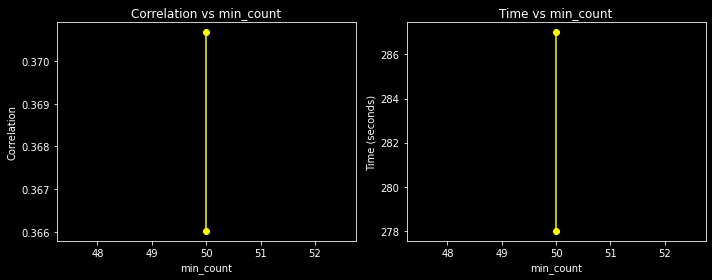

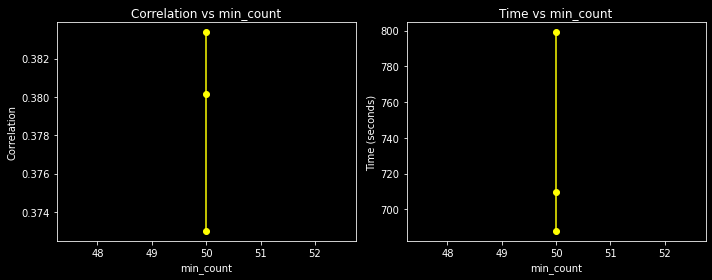

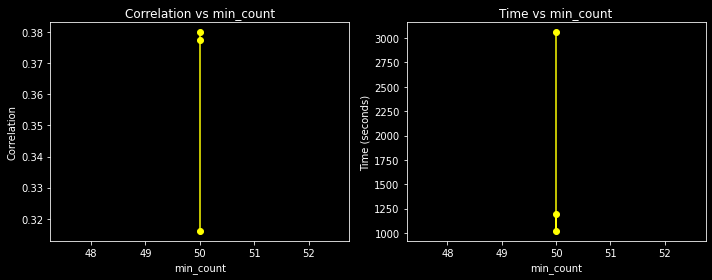

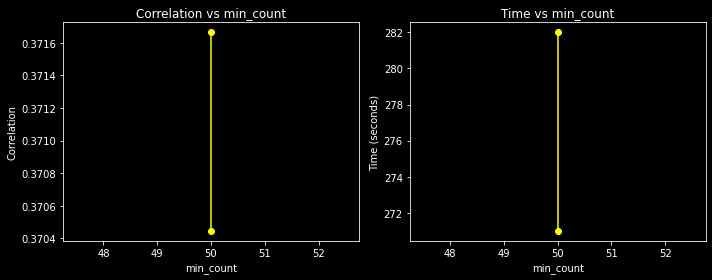

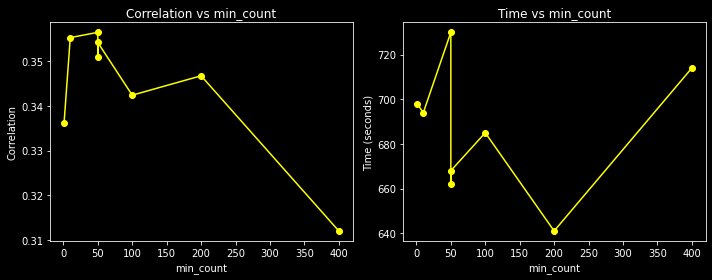

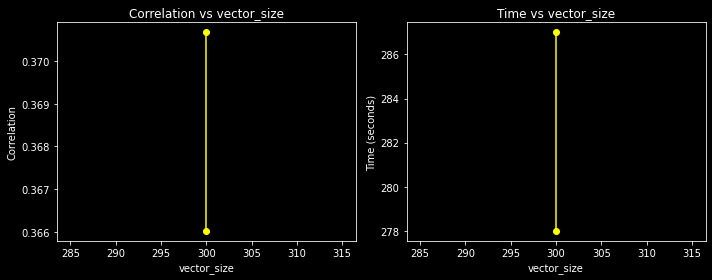

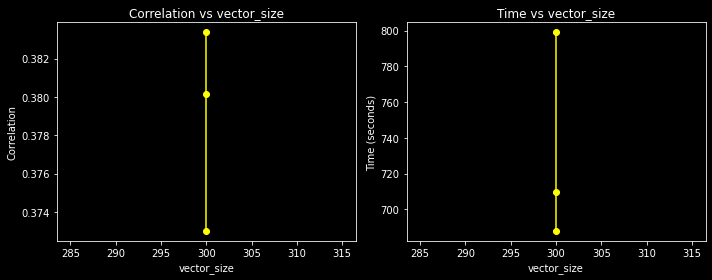

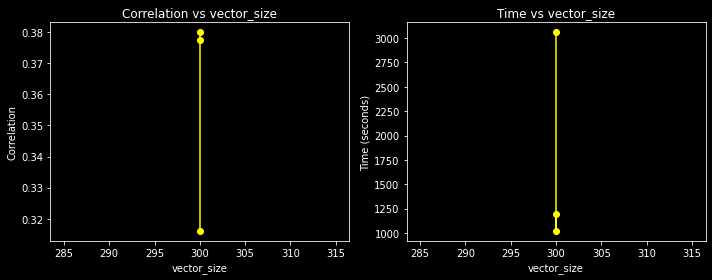

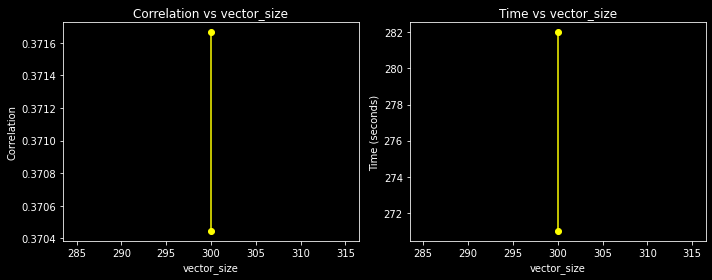

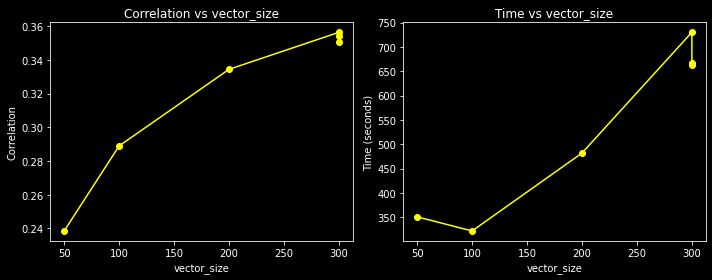

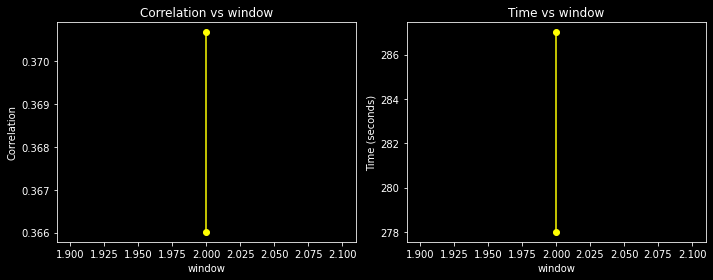

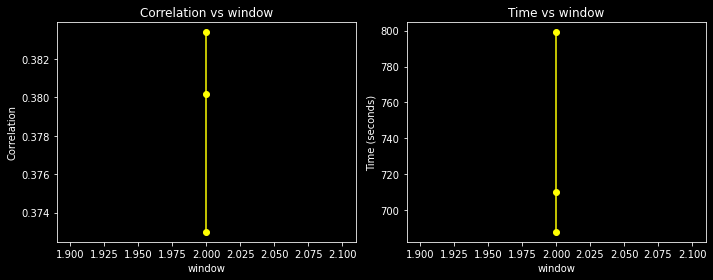

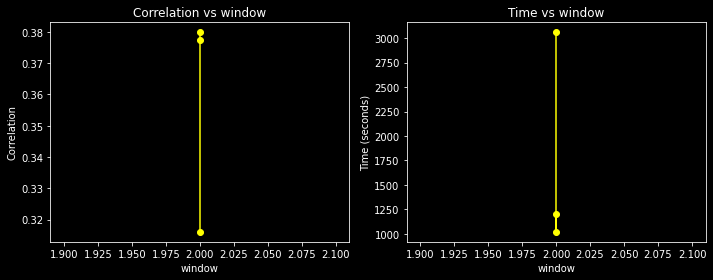

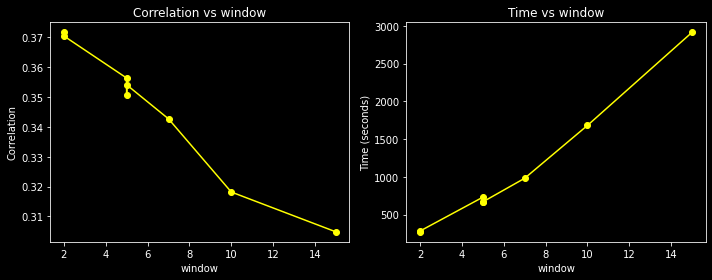

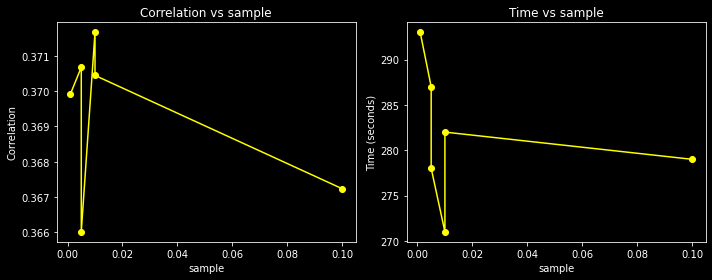

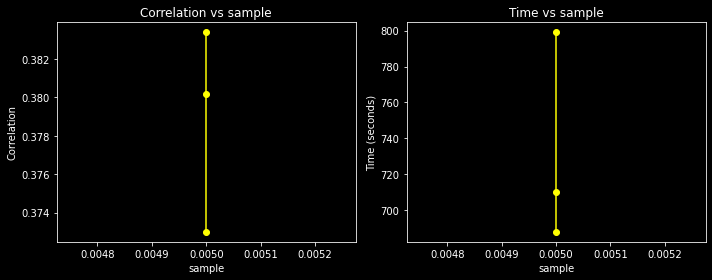

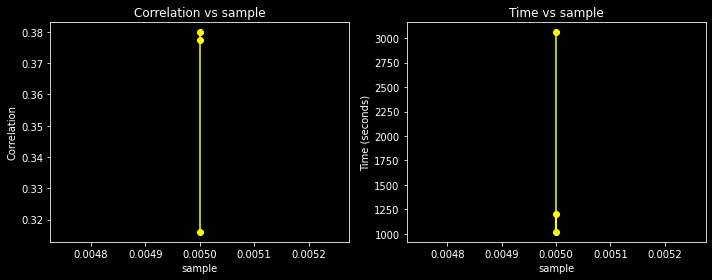

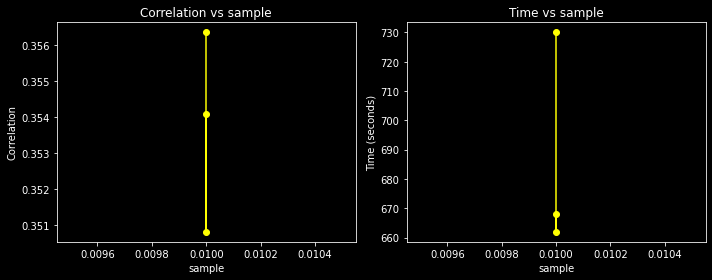

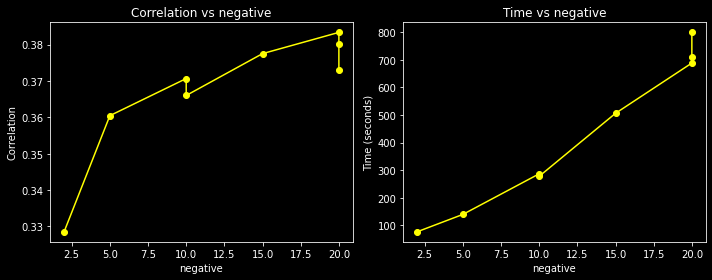

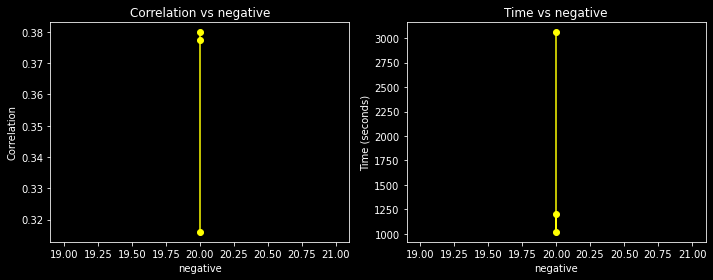

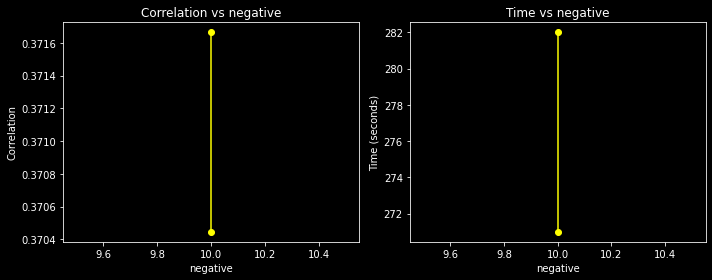

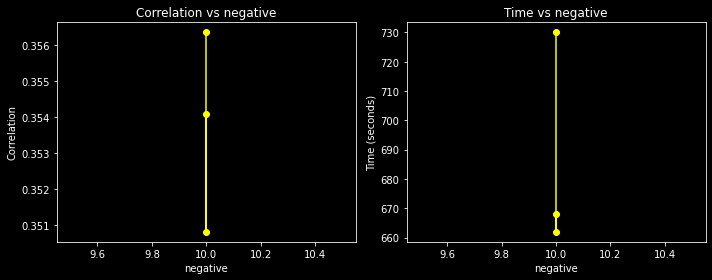

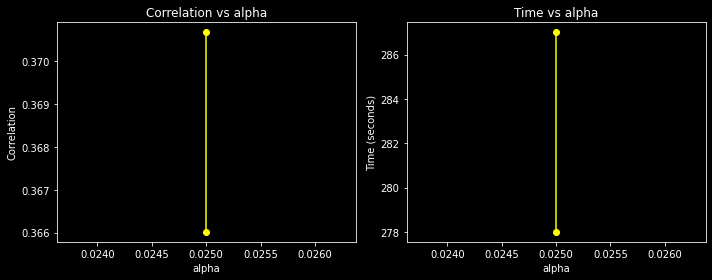

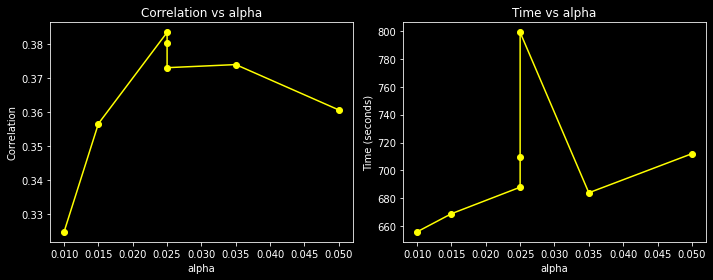

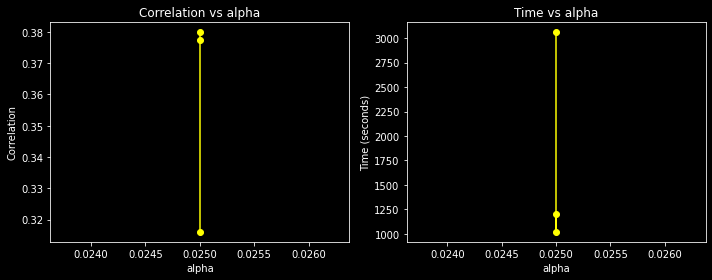

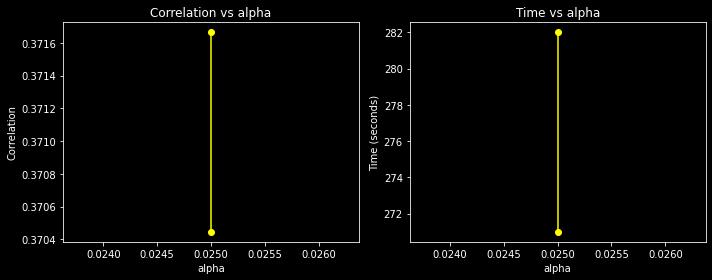

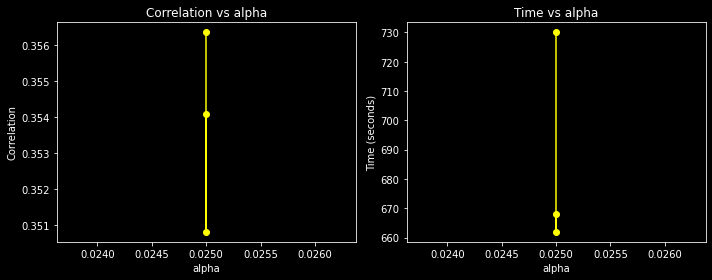

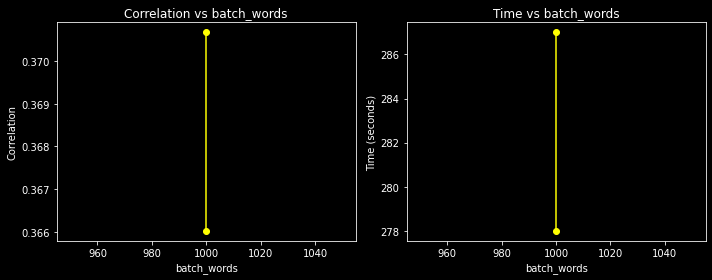

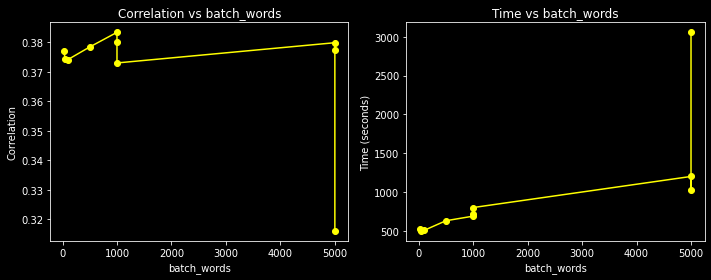

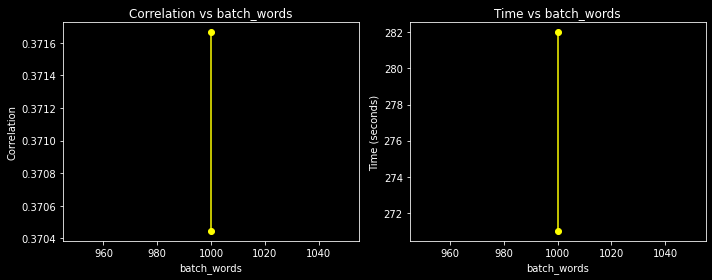

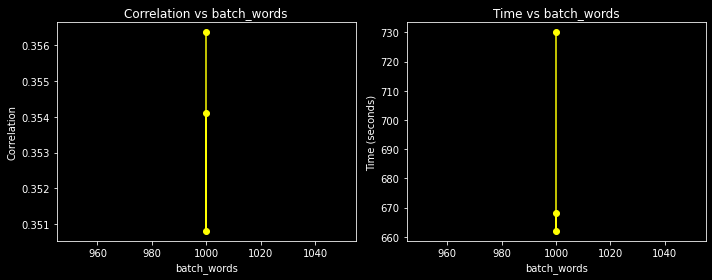

In [7]:
import matplotlib.pyplot as plt

# Your DataFrame here, named df

# Use these lines to set the plot style to dark background
plt.style.use('dark_background')

# List of hyperparameters, ignoring 'hs'
params = [
    'min_count',
    'vector_size',
    'window',
    'sample',
    'negative',
    'alpha',
    'batch_words'
]

# Function to compute time difference in seconds
def compute_time_diff(row):
    return (row['end_time'] - row['start_time']).seconds

# Adding a new column to DataFrame to store time difference
df['time_diff'] = df.apply(compute_time_diff, axis=1)

# Loop through each parameter for plotting
for param in params:
    fixed_params = [p for p in params if p != param]
    grouped = df.groupby(fixed_params)
    
    for name, group in grouped:
        if len(group) < 2:
            continue

        sorted_group = group.sort_values(by=param)
        unique_vals = sorted_group[param].unique()

        if len(unique_vals) > 6:
            unique_vals = unique_vals[:6]
        
        filtered_group = sorted_group[sorted_group[param].isin(unique_vals)]

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.plot(filtered_group[param], filtered_group['correlation'], marker='o', color='yellow')
        plt.title(f'Correlation vs {param}', color='white')
        plt.xlabel(param, color='white')
        plt.ylabel('Correlation', color='white')
        plt.tick_params(colors='white')

        plt.subplot(1, 2, 2)
        plt.plot(filtered_group[param], filtered_group['time_diff'], marker='o', color='yellow')
        plt.title(f'Time vs {param}', color='white')
        plt.xlabel(param, color='white')
        plt.ylabel('Time (seconds)', color='white')
        plt.tick_params(colors='white')

        plt.tight_layout()
        plt.show()
